## Import and Read-Data

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
df = pd.read_csv("../data/train.csv")

## Get Date-Cols From Dates Attribute

In [15]:
df['Dates'] = pd.to_datetime(df['Dates'])
df['Hour'] = df['Dates'].dt.hour
df['Month'] = df['Dates'].dt.month
df['Year'] = df['Dates'].dt.year
df['day'] = df['Dates'].dt.day
df['count_days'] = (df['Dates'] - df['Dates'].min()).apply(lambda x: x.days)

In [16]:
df.shape

(878049, 14)

## Duplicates and Null's Handling

In [17]:
df.duplicated().sum()

np.int64(2323)

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
for col in df.select_dtypes(include='number'):
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers of {col} is = {len(outliers)}")


Outliers of X is = 60126
Outliers of Y is = 67
Outliers of Hour is = 0
Outliers of Month is = 0
Outliers of Year is = 0
Outliers of day is = 0
Outliers of count_days is = 0


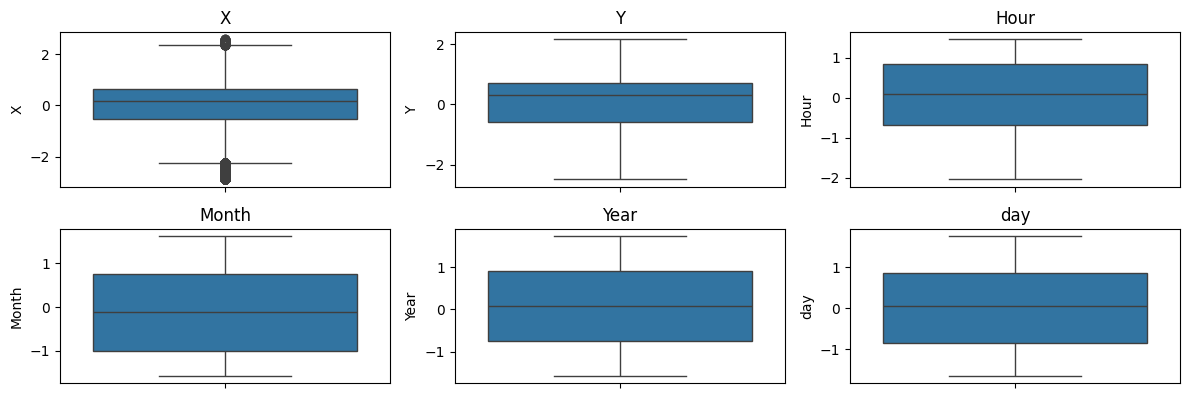

In [28]:
columns_with_outliers = ["X", "Y", "Hour", "Month", "Year", "day"]

plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_with_outliers, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()  
plt.show()

In [21]:
Q1_X = df['X'].quantile(0.25)
Q3_X = df['X'].quantile(0.75)
IQR_X = Q3_X - Q1_X

Q1_Y = df['Y'].quantile(0.25)
Q3_Y = df['Y'].quantile(0.75)
IQR_Y = Q3_Y - Q1_Y

df = df[(df['X'] >= Q1_X - 1.5 * IQR_X) & (df['X'] <= Q3_X + 1.5 * IQR_X)]

df = df[(df['Y'] >= Q1_Y - 1.5 * IQR_Y) & (df['Y'] <= Q3_Y + 1.5 * IQR_Y)]

## Scaling and Encoding

In [29]:
numeric_cols = df.select_dtypes(include=['number']).columns

scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

category_encoder = LabelEncoder()
district_encoder = LabelEncoder()

df['Category'] = category_encoder.fit_transform(df['Category'])
df['PdDistrict'] = district_encoder.fit_transform(df['PdDistrict'])

In [30]:
df.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Hour', 'Month', 'Year', 'day',
       'count_days'],
      dtype='object')

In [31]:
data = df.drop(['Descript','DayOfWeek', 'Resolution' , 'Address' , 'Year' , 'Dates' ], axis=1)

In [32]:
data.shape

(815600, 8)

In [33]:
data.head()

,Category,PdDistrict,X,Y,Hour,Month,day,count_days
0,37,4,-0.411790,0.279439,1.462044,-0.41831,-0.293857,1.698714
1,21,4,-0.411790,0.279439,1.462044,-0.41831,-0.293857,1.698714
2,21,4,-0.329683,1.351371,1.462044,-0.41831,-0.293857,1.698714
3,16,4,-0.471069,1.370401,1.462044,-0.41831,-0.293857,1.698714
4,16,5,-1.101770,0.152488,1.462044,-0.41831,-0.293857,1.698714


In [34]:
data.to_csv("../data/preprocessed_data.csv", index=False)